# Generación de Spark Dataframe
Con este script se copian los datos input del modelo al bucket del storage.



In [1]:
#from __future__ import absolute_import
import sys

os.environ['PYSPARK_SUBMIT_ARGS'] = '--name "rec_cuenta" --master yarn --conf spark.executor.memory=3G --conf spark.executor.cores=1 --conf spark.executor.instances=32 pyspark-shell' 

#!{sys.executable} -m pip install --upgrade pip
#!{sys.executable} -m pip install py4j==0.10.7 --force-reinstall
#!{sys.executable} -m pip install numpy==1.15.4
#!{sys.executable} -m pip install pandas==0.24.1
#!{sys.executable} -m pip install pandas-gbq==0.9.0
#!{sys.executable} -m pip install google-cloud-bigquery==1.9.0
#!{sys.executable} -m pip install google-cloud-storage==1.14.0
#!{sys.executable} -m pip freeze
#!{sys.executable} -m pip install seaborn
#!{sys.executable} -m pip install tensorflow
#!{sys.executable} -m pip install google
#!{sys.executable} -m pip install datalab
#!{sys.executable} -m pip install pyspark


In [2]:
from IPython.display import Audio
def beep():
    return Audio(np.sin(np.pi*100*np.arange(1000*2)/1000),rate=10000, autoplay=True)

In [3]:
#from __future__ import absolute_import
#import sys
#!{sys.executable} -m pip install tensorboard


In [4]:
#import seaborn as sns
#import matplotlib.pyplot as plt
#import pandas as pd
#import numpy as np
#import shutil
import numpy as np
import tensorflow as tf
import shutil
import io
import pandas as pd
from pyspark.sql.functions import explode, col, log, collect_list, collect_set, udf, array, size
from pyspark.sql.types import ArrayType, FloatType,StringType, IntegerType, StructType, StructField

#from google.datalab.ml import TensorBoard



import pyspark
from pyspark.context import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql.session import SparkSession
from pyspark.sql import Row




In [5]:
### DESCOMENTAR LA SIGUIENTE LÍNEA PARA PASO A PRODUCCIÓN ###


#sc


sc.getConf().toDebugString()

'spark.app.id=application_1551903967241_0207\nspark.app.name=pyspark-shell\nspark.driver.appUIAddress=http://dprc-mkt-tensorflow-tony-jupyter-m.c.sistemas-bi.internal:4040\nspark.driver.extraJavaOptions=-Dflogger.backend_factory=com.google.cloud.hadoop.repackaged.gcs.com.google.common.flogger.backend.log4j.Log4jBackendFactory#getInstance\nspark.driver.host=dprc-mkt-tensorflow-tony-jupyter-m.c.sistemas-bi.internal\nspark.driver.maxResultSize=1920m\nspark.driver.memory=3840m\nspark.driver.port=39553\nspark.dynamicAllocation.enabled=true\nspark.dynamicAllocation.maxExecutors=10000\nspark.dynamicAllocation.minExecutors=1\nspark.eventLog.dir=hdfs://dprc-mkt-tensorflow-tony-jupyter-m/user/spark/eventlog\nspark.eventLog.enabled=true\nspark.executor.cores=1\nspark.executor.extraJavaOptions=-Dflogger.backend_factory=com.google.cloud.hadoop.repackaged.gcs.com.google.common.flogger.backend.log4j.Log4jBackendFactory#getInstance\nspark.executor.id=driver\nspark.executor.instances=32\nspark.executor

## Leyendo data desde la carpeta local

In [6]:
## Parámetros a tener en cuenta en DEV

training_split =0.8
testing_split = 0.1
eval_split= 0.1
eval_split

0.1

In [7]:
# reading from bucket
bucket = sc._jsc.hadoopConfiguration().get('fs.gs.system.bucket')
print(bucket)
todays_date = '2019_02_18_13_39_11' #'2019_02_15_19_01_20'
bucket_name = "datasets_prueba"
datafr_name = "local"
bucket_path = "gs://{}/{}/{}/{}".format(bucket, bucket_name, datafr_name, todays_date)
print(bucket_path)


pry_spsa
gs://pry_spsa/datasets_prueba/local/2019_02_18_13_39_11


In [8]:
# Ruta para guardar los diccionarios generados

bucket = sc._jsc.hadoopConfiguration().get('fs.gs.system.bucket')
bucket_name_subfolder = "research"
datafr_name = "subfamilia_rec"
type_data = "diccionario_usr"
bucket_path_dict_cuenta_userId = "gs://{}/{}/{}/{}/".format(bucket, bucket_name_subfolder, datafr_name, type_data)

type_data = "diccionario_subfamilia"
bucket_path_dict_cat_itemId = "gs://{}/{}/{}/{}/".format(bucket, bucket_name_subfolder, datafr_name, type_data)

print(bucket_path_dict_cat_itemId)

gs://pry_spsa/research/subfamilia_rec/diccionario_subfamilia/


In [9]:
# guardamos nuestros ratings continuos en la carpeta 

#bucket_name = "datasets_prueba"
#datafr_name = "local"
training_folder_name="rec_cuenta_subF_train"
testing_folder_name="rec_cuenta_subF_test"
eval_folder_name="rec_cuenta_subF_eval"
type_rating="continuo"

path_rating_continuo_training = "gs://{}/{}/{}/{}/{}/".format(bucket, bucket_name_subfolder, datafr_name,type_rating,training_folder_name)
path_rating_continuo_testing = "gs://{}/{}/{}/{}/{}/".format(bucket, bucket_name_subfolder, datafr_name,type_rating,testing_folder_name)
path_rating_continuo_eval = "gs://{}/{}/{}/{}/{}/".format(bucket, bucket_name_subfolder, datafr_name,type_rating,eval_folder_name)
#bucket_path_codigo_cuenta = "gs://{}/{}/{}/{}/".format(bucket, bucket_name, codigos_subF ,codigos_cuenta_folder)
#bucket_path_codigo_producto = "gs://{}/{}/{}/{}/".format(bucket, bucket_name, codigos_subF ,codigos_producto_folder)



print(path_rating_continuo_training)
print(path_rating_continuo_testing)
print(path_rating_continuo_eval)

gs://pry_spsa/research/subfamilia_rec/continuo/rec_cuenta_subF_train/
gs://pry_spsa/research/subfamilia_rec/continuo/rec_cuenta_subF_test/
gs://pry_spsa/research/subfamilia_rec/continuo/rec_cuenta_subF_eval/


In [10]:
# guardamos nuestros ratings continuos en la carpeta 

#bucket_name = "datasets_prueba"
#datafr_name = "local"
training_folder_name="rec_cuenta_subF_train"
testing_folder_name="rec_cuenta_subF_test"
eval_folder_name="rec_cuenta_subF_eval"
type_rating="binario"

path_rating_binario_training = "gs://{}/{}/{}/{}/{}/".format(bucket, bucket_name_subfolder, datafr_name,type_rating,training_folder_name)
path_rating_binario_testing = "gs://{}/{}/{}/{}/{}/".format(bucket, bucket_name_subfolder, datafr_name,type_rating,testing_folder_name)
path_rating_binario_eval = "gs://{}/{}/{}/{}/{}/".format(bucket, bucket_name_subfolder, datafr_name,type_rating,eval_folder_name)
#bucket_path_codigo_cuenta = "gs://{}/{}/{}/{}/".format(bucket, bucket_name, codigos_subF ,codigos_cuenta_folder)
#bucket_path_codigo_producto = "gs://{}/{}/{}/{}/".format(bucket, bucket_name, codigos_subF ,codigos_producto_folder)



print(path_rating_binario_training)
print(path_rating_binario_testing)
print(path_rating_binario_eval)

gs://pry_spsa/research/subfamilia_rec/binario/rec_cuenta_subF_train/
gs://pry_spsa/research/subfamilia_rec/binario/rec_cuenta_subF_test/
gs://pry_spsa/research/subfamilia_rec/binario/rec_cuenta_subF_eval/


In [11]:
#bucket = sc._jsc.hadoopConfiguration().get('fs.gs.system.bucket')
#print(bucket)

#project = sc._jsc.hadoopConfiguration().get('fs.gs.project.id')
#print(project)
    
#todays_date = datetime.strftime(datetime.today(), "%Y_%m_%d_%H_%M_%S")
#input_directory = "gs://{}/tmp/spsa-{}".format(bucket, todays_date)
#input_directory = "gs://{}/datasets_prueba/".format(bucket)
#print(input_directory)


## Recuperación de Datos Spark

In [12]:
parquet_files = "{}/part-*.snappy.parquet".format(bucket_path)
print(parquet_files)

sdf = spark.read.parquet(parquet_files)
#sdf.cache()
# creamos View para poder trabajar usando SQL con spark y filtramos los casos en que el codigo cuenta tenga menos de 5 items
sdf.createOrReplaceTempView("sdf")

gs://pry_spsa/datasets_prueba/local/2019_02_18_13_39_11/part-*.snappy.parquet


In [13]:
#sdf.show(1)
# PREGUNTARLE A EDU QUE PASA CON LAS SUBFAMILIAS
# respuesta: lo equivalente a subfamilias es categoría

sdf.columns

['anio_calendario',
 'categoria',
 'cluster',
 'codigo_cuenta',
 'codigo_producto',
 'costo_kardex',
 'margen',
 'monto_dscto_producto',
 'nro_dia_anio',
 'nro_dia_mes',
 'nro_mes_anio',
 'nro_semana_anio',
 'seccion_dia_compra',
 'semestre_calendario',
 'trimestre_calendario',
 'venta_bruta',
 'venta_neta',
 'venta_total',
 'venta_unidad']

In [14]:

# Creación de diccionarios de mapeo de codigo_cuenta a userId y de categoria a itemId

#bucket_path_dict_cuenta_userId="gs://pry_spsa/datasets_prueba_subF/diccionario_cuenta_userId"
#bucket_path_dict_cat_itemId="gs://pry_spsa/datasets_prueba_subF/diccionario_producto_userId"

user_mapping=spark.sql('''with cuentas as 
                        (Select  distinct codigo_cuenta from sdf) 
                        select codigo_cuenta, 
                        ROW_NUMBER() OVER(ORDER BY codigo_cuenta asc) userId from cuentas ''' )

cat_mapping=spark.sql('''with producto as 
                        (Select  distinct categoria from sdf) 
                        select categoria, 
                        ROW_NUMBER() OVER(ORDER BY categoria asc) itemId from producto ''' )

#Guardamos diccionarios para usarlos
user_mapping.write.mode('overwrite').option("header","true").parquet(bucket_path_dict_cuenta_userId)
cat_mapping.write.mode('overwrite').option("header","true").parquet(bucket_path_dict_cat_itemId)


# Creamos vista para hacer joins que conviertan de cuenta y producto a userId e itemId


user_mapping.createOrReplaceTempView("user_mapping")
cat_mapping.createOrReplaceTempView("cat_mapping")
beep()

In [15]:
user_mapping.show(4)

+----------------+------+
|   codigo_cuenta|userId|
+----------------+------+
|6043560006358567|     1|
|6043560006939531|     2|
|6043560011397113|     3|
|6043560015161168|     4|
+----------------+------+
only showing top 4 rows



In [16]:
cat_mapping.show()

+--------------------+------+
|           categoria|itemId|
+--------------------+------+
|A01|S01|L001|F000...|     1|
|A01|S01|L001|F000...|     2|
|A01|S01|L001|F000...|     3|
|A01|S01|L001|F000...|     4|
|A01|S01|L001|F000...|     5|
|A01|S01|L001|F000...|     6|
|A01|S01|L002|F000...|     7|
|A01|S01|L002|F000...|     8|
|A01|S01|L002|F000...|     9|
|A01|S01|L002|F000...|    10|
|A01|S01|L002|F000...|    11|
|A01|S01|L002|F000...|    12|
|A01|S01|L003|F000...|    13|
|A01|S01|L003|F000...|    14|
|A01|S01|L003|F000...|    15|
|A01|S01|L003|F000...|    16|
|A01|S01|L003|F000...|    17|
|A01|S01|L003|F000...|    18|
|A01|S01|L003|F000...|    19|
|A01|S01|L004|F000...|    20|
+--------------------+------+
only showing top 20 rows



In [17]:
cat_mapping.first()

Row(categoria='A01|S01|L001|F0001|SF00001', itemId=1)

## Crear split de training , Validation and Evaluation of Dataset para Rating Continuo

1) Se necesita dividir la cantidad de CODIGO CUENTA unicos y separarlos en tres conjuntos de entrenamiento.


## Creación de Rating Continuo


In [18]:


#query_cod_cuentas='''Select  distinct codigo_cuenta from sdf ''' 

cod_cuenta=spark.sql('''Select  distinct codigo_cuenta from sdf ''' )
cod_producto=spark.sql('''Select  distinct categoria as codigo_producto from sdf ''' )

#codigos de testeo que se usaran como keys para predecir

#cod_cuenta=spark.sql('''Select distinct codigo_cuenta from eval_cod_cuenta''')
#cod_cuenta.write.mode("overwrite").format('csv').save('gs://pry_spsa/datasets_prueba/cod_cuenta/',header = 'true')


train_cod_cuenta, test_cod_cuenta, eval_cod_cuenta= cod_cuenta.randomSplit([training_split,testing_split,eval_split], 625) #490373 unicos codigo_cuenta

# creamos dos tablas para poder filtrar la data de acuerdo a los codigos cuentas que se haya usado en training y testing 
train_cod_cuenta.createOrReplaceTempView("training_cod_cuenta")
test_cod_cuenta.createOrReplaceTempView("testing_cod_cuenta")
eval_cod_cuenta.createOrReplaceTempView("eval_cod_cuenta")
train_cod_cuenta.show()
#beep()


+----------------+
|   codigo_cuenta|
+----------------+
|6043566000001780|
|6043566000008942|
|6043566000012605|
|6043566000029922|
|6043566000037909|
|6043566000039582|
|6043566000042602|
|6043566000046082|
|6043566000047460|
|6043566000048674|
|6043566000051645|
|6043566000055471|
|6043566000063632|
|6043566000068276|
|6043566000075271|
|6043566000080982|
|6043566000081394|
|6043566000084950|
|6043566000093506|
|6043566000096111|
+----------------+
only showing top 20 rows



### haciendo el split de los datos

In [19]:
train_cod_cuenta.count()

392406

In [20]:
sdf.show(5)

+---------------+--------------------+-------+----------------+---------------+------------+--------------------+--------------------+------------+-----------+------------+---------------+------------------+-------------------+--------------------+-----------+----------+-----------+------------+
|anio_calendario|           categoria|cluster|   codigo_cuenta|codigo_producto|costo_kardex|              margen|monto_dscto_producto|nro_dia_anio|nro_dia_mes|nro_mes_anio|nro_semana_anio|seccion_dia_compra|semestre_calendario|trimestre_calendario|venta_bruta|venta_neta|venta_total|venta_unidad|
+---------------+--------------------+-------+----------------+---------------+------------+--------------------+--------------------+------------+-----------+------------+---------------+------------------+-------------------+--------------------+-----------+----------+-----------+------------+
|           2018|A06|S12|L057|F020...|      2|6043566000167888|    00020061231|         3.1|-0.04000000000000

In [21]:

#https://www.quora.com/How-do-I-build-a-recommendation-system-using-transaction-data-quantity-purchased-sales-How-do-I-convert-the-transaction-table-to-rating-table

sql_training_query='''select a.codigo_cuenta, 
                     a.categoria,
                     round(float(sum(venta_bruta)/avg(total_cod)),3) rating
                     from sdf a
                     inner join (select codigo_cuenta, sum(venta_bruta) total_cod from sdf group by codigo_cuenta) b
                     on a.codigo_cuenta=b.codigo_cuenta
                     where a.codigo_cuenta in (select distinct codigo_cuenta from training_cod_cuenta) 
                     group by a.codigo_cuenta,a.categoria 
                     --order by codigo_cuenta
'''
# NOTA PASQUI
# cambio para codigo de subfamilia canal offline
# group by a.codigo_cuenta,a.codigo_subfamilia order by codigo_cuenta
# el rating se calcula aca como el porcentaje de las ventas de cada cliente

sql_testing_query='''
                     select a.codigo_cuenta, 
                     a.categoria,
                     round(float(sum(venta_bruta)/avg(total_cod)),3) rating
                     from sdf a
                     inner join (select codigo_cuenta, sum(venta_bruta) total_cod from sdf group by codigo_cuenta) b
                     on a.codigo_cuenta=b.codigo_cuenta
                     where a.codigo_cuenta in (select distinct codigo_cuenta from testing_cod_cuenta) 
                     group by a.codigo_cuenta,a.categoria
'''

sql_eval_query='''select a.codigo_cuenta, 
                  a.categoria,
                  round(float(sum(venta_bruta)/avg(total_cod)),3) rating
                  from sdf a
                  inner join (select codigo_cuenta, sum(venta_bruta) total_cod from sdf group by codigo_cuenta) b
                  on a.codigo_cuenta=b.codigo_cuenta
                  where a.codigo_cuenta in (select distinct codigo_cuenta from testing_cod_cuenta) 
                  group by a.codigo_cuenta,a.categoria
'''


training_df_cod = spark.sql(sql_training_query)
testing_df_cod = spark.sql(sql_testing_query)
eval_df_cod = spark.sql(sql_eval_query)

#training_df_cod=training_df_cod.filter(col('rating')>0)
#testing_df_cod=testing_df_cod .filter(col('rating')>0)
#eval_df_cod=eval_df_cod.filter(col('rating')>0)

## Creacion de tablas para query

training_df_cod.createOrReplaceTempView("training_df_cod")
testing_df_cod.createOrReplaceTempView("testing_df_cod")
eval_df_cod.createOrReplaceTempView("eval_df_cod")

training_df_cod.show(10)


+----------------+--------------------+------+
|   codigo_cuenta|           categoria|rating|
+----------------+--------------------+------+
|6043566000001780|A04|S08|L045|F017...| 0.161|
|6043566000001780|A01|S02|L011|F004...| 0.046|
|6043566000001780|A06|S13|L058|F020...| 0.009|
|6043566000001780|A05|S10|L050|F018...| 0.021|
|6043566000001780|A02|S03|L016|F006...| 0.023|
|6043566000001780|A10|S24|L087|F026...| 0.171|
|6043566000001780|A05|S11|L053|F019...| 0.063|
|6043566000001780|A05|S11|L052|F019...| 0.094|
|6043566000001780|A01|S02|L011|F004...|  0.02|
|6043566000001780|A06|S13|L058|F021...| 0.012|
+----------------+--------------------+------+
only showing top 10 rows



## Usar diccionario de mapeo para convertir codigo cuenta a userId y codigo producto a itemId

In [22]:
## Hacemos el join para poder entrenar con user_id e item_id en vez de codigo_cuenta y codigo_producto

training_join_user_id_item_id='''Select b.userId, c.itemId, a.rating 
                             from training_df_cod a join user_mapping b on a.codigo_cuenta= b.codigo_cuenta 
                             join cat_mapping c on a.categoria=c.categoria

'''
testing_join_user_id_item_id='''Select b.userId, c.itemId, a.rating 
                             from testing_df_cod a join user_mapping b on a.codigo_cuenta= b.codigo_cuenta 
                             join cat_mapping c on a.categoria=c.categoria

'''
eval_join_user_id_item_id='''Select b.userId, c.itemId, a.rating 
                             from eval_df_cod a join user_mapping  b on a.codigo_cuenta= b.codigo_cuenta 
                             join cat_mapping c on a.categoria=c.categoria

'''

training_df= spark.sql(training_join_user_id_item_id)
testing_df= spark.sql(testing_join_user_id_item_id)
eval_df= spark.sql(eval_join_user_id_item_id)

training_df.createOrReplaceTempView("training_df")  
training_df.show(4)


+------+------+------+
|userId|itemId|rating|
+------+------+------+
|   444|   129| 0.002|
|   663|   129| 0.002|
|   927|   129| 0.005|
|   984|   129| 0.049|
+------+------+------+
only showing top 4 rows



## Salvamos el rating Continuo

In [23]:
#guardamos los datasets de raings como un csv en el bucket_path_rating

training_df.write.mode("overwrite").option("header","true").parquet(path_rating_continuo_training)
testing_df.write.mode("overwrite").option("header","true").parquet(path_rating_continuo_testing)
eval_df.write.mode("overwrite").option("header","true").parquet(path_rating_continuo_eval)

training_df.dtypes

[('userId', 'int'), ('itemId', 'int'), ('rating', 'float')]

In [24]:
training_df.count()

16276580

## Creación de histograma para análisis de raiting Continuo

In [25]:
sdf.schema

StructType(List(StructField(anio_calendario,StringType,true),StructField(categoria,StringType,true),StructField(cluster,StringType,true),StructField(codigo_cuenta,StringType,true),StructField(codigo_producto,StringType,true),StructField(costo_kardex,DoubleType,true),StructField(margen,DoubleType,true),StructField(monto_dscto_producto,DoubleType,true),StructField(nro_dia_anio,StringType,true),StructField(nro_dia_mes,StringType,true),StructField(nro_mes_anio,StringType,true),StructField(nro_semana_anio,StringType,true),StructField(seccion_dia_compra,StringType,true),StructField(semestre_calendario,StringType,true),StructField(trimestre_calendario,StringType,true),StructField(venta_bruta,DoubleType,true),StructField(venta_neta,DoubleType,true),StructField(venta_total,DoubleType,true),StructField(venta_unidad,DoubleType,true)))

In [26]:
query_venta_bruta='''select codigo_cuenta, categoria, 
                     sum(venta_bruta) tot_venta_bruta, 
                     log(sum(venta_bruta)) log_tot_venta_bruta
                     from sdf group by codigo_cuenta, categoria'''

venta_bruta=spark.sql(query_venta_bruta)
venta_bruta.createOrReplaceTempView("venta_bruta")
venta_bruta.show(5)
venta_bruta.schema

+----------------+--------------------+------------------+-------------------+
|   codigo_cuenta|           categoria|   tot_venta_bruta|log_tot_venta_bruta|
+----------------+--------------------+------------------+-------------------+
|6043566008724706|A02|S03|L015|F006...|107.92000000000002|  4.681390211899501|
|6043566002809743|A06|S12|L057|F020...|              92.7|  4.529368472571809|
|6043566007577246|A04|S08|L045|F017...| 58.93000000000001|  4.076350298849822|
|6043567000215909|A09|S20|L075|F024...| 22753.90000000003| 10.032491838258329|
|6043566013867003|A01|S02|L010|F004...|47.169999999999995| 3.8537580972961702|
+----------------+--------------------+------------------+-------------------+
only showing top 5 rows



StructType(List(StructField(codigo_cuenta,StringType,true),StructField(categoria,StringType,true),StructField(tot_venta_bruta,DoubleType,true),StructField(log_tot_venta_bruta,DoubleType,true)))

In [27]:
## ploteamos las ventas brutas

gre_histogram = venta_bruta.select('tot_venta_bruta').rdd.flatMap(lambda x: x).histogram(11)

# Loading the Computed Histogram into a Pandas Dataframe for plotting
pd.DataFrame(
    list(zip(*gre_histogram)), 
    columns=['tot_venta_bruta', 'frequency']
).set_index(
    'tot_venta_bruta'
).plot(kind='bar')


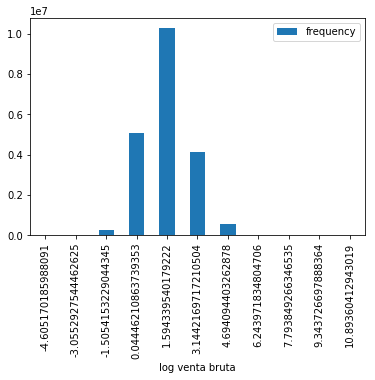

In [28]:
## Ploteamos los logartimos de las ventas

log_histogram = venta_bruta.select('log_tot_venta_bruta').rdd.flatMap(lambda x: x).histogram(11)

# Loading the Computed Histogram into a Pandas Dataframe for plotting
pd.DataFrame(
    list(zip(*log_histogram)), 
    columns=['log venta bruta', 'frequency']
).set_index(
    'log venta bruta'
).plot(kind='bar')

De acuerdo al análisis del logaritmo de la venta bruta los valores cuyo  logaritmo sean menos que cero serán considerados con label 0 y los mayores a 0 con label 1 para asi crear el rating implicito

## creación de rating binario

In [29]:
query_binary_rating='''select codigo_cuenta, categoria, 
                         case when log_tot_venta_bruta > 0 then 1 else 0 end as rating
                         from venta_bruta
                        '''

binary_rating= spark.sql(query_binary_rating)
binary_rating.createOrReplaceTempView("binary_rating")
binary_rating.show()
binary_rating.schema

+----------------+--------------------+------+
|   codigo_cuenta|           categoria|rating|
+----------------+--------------------+------+
|6043566007700570|A05|S10|L050|F018...|     1|
|6043566009784618|A01|S02|L013|F005...|     1|
|6043566013195611|A01|S02|L007|F002...|     1|
|6043566000305389|A06|S13|L059|F021...|     1|
|6043567000215909|A09|S20|L075|F024...|     1|
|6043566012531048|A01|S02|L010|F004...|     0|
|6043567000033948|A03|S06|L027|F010...|     1|
|6043566001133848|A09|S21|L078|F024...|     1|
|6043566012752693|A02|S03|L015|F006...|     1|
|6043566001408653|A02|S03|L015|F005...|     1|
|6043566002523997|A06|S13|L058|F020...|     1|
|6043566002575138|A01|S02|L011|F004...|     1|
|6043566000650974|A03|S07|L034|F014...|     1|
|6043566007254481|A02|S03|L018|F007...|     1|
|6043566010011662|A06|S13|L058|F020...|     1|
|6043566002275127|A01|S01|L003|F000...|     1|
|6043566001537162|A06|S13|L058|F020...|     1|
|6043566001437108|A06|S13|L059|F021...|     1|
|604356700021

StructType(List(StructField(codigo_cuenta,StringType,true),StructField(categoria,StringType,true),StructField(rating,IntegerType,false)))

In [30]:
## Hacemos el join para poder entrenar con user_id e item_id en vez de codigo_cuenta y codigo_producto

total_join_user_id_item_id='''Select b.userId, c.itemId, a.rating 
                             from binary_rating a join user_mapping b on a.codigo_cuenta= b.codigo_cuenta 
                             join cat_mapping c on a.categoria=c.categoria'''

total_binary_df= spark.sql(total_join_user_id_item_id)

total_binary_df.createOrReplaceTempView("total_binary_df")  
total_binary_df.show(4)

+------+------+------+
|userId|itemId|rating|
+------+------+------+
|  2755|   129|     1|
|  3605|   129|     1|
|  3918|   129|     1|
|  4921|   129|     1|
+------+------+------+
only showing top 4 rows



In [31]:
train_user_binary, test_user_binary, eval_user_binary= total_binary_df.randomSplit([training_split,testing_split,eval_split], 625) #490373 unicos codigo_cuenta

# creamos dos tablas para poder filtrar la data de acuerdo a los codigos cuentas que se haya usado en training y testing 
train_user_binary.createOrReplaceTempView("train_user_binary")
test_user_binary.createOrReplaceTempView("test_user_binary")
eval_user_binary.createOrReplaceTempView("eval_user_binary")
beep()

In [32]:

binary_training_query='''select * from total_binary_df
                     where userId in (select distinct userId from train_user_binary) '''

binary_testing_query='''select * from total_binary_df
                     where userId in (select distinct userId from test_user_binary) '''

binary_eval_query='''select * from total_binary_df
                  where userId in (select distinct userId from eval_user_binary)'''


binary_training_df = spark.sql(binary_training_query)
binary_testing_df = spark.sql(binary_testing_query)
binary_eval_df = spark.sql(binary_eval_query)
binary_training_df.show(10)
beep()

+------+------+------+
|userId|itemId|rating|
+------+------+------+
|  2755|   129|     1|
|  3605|   129|     1|
|  3918|   129|     1|
|  4921|   129|     1|
|  5476|   129|     1|
|  6488|   129|     1|
|  6557|   129|     1|
|  6582|   129|     1|
|  8228|   129|     1|
|  8306|   129|     1|
+------+------+------+
only showing top 10 rows



In [33]:
# guardamos los archivos en formato parquet
binary_training_df.write.mode("overwrite").option("header","true").parquet(path_rating_binario_training)
binary_testing_df.write.mode("overwrite").option("header","true").parquet(path_rating_binario_testing)
binary_eval_df.write.mode("overwrite").option("header","true").parquet(path_rating_binario_eval)
#sdf.unpersist()

In [34]:
binary_training_df.schema

StructType(List(StructField(userId,IntegerType,true),StructField(itemId,IntegerType,true),StructField(rating,IntegerType,false)))

In [35]:
beep()